In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [54]:
dataset = pd.read_csv("C:/Users/UserName/Desktop/인공지능 개론/데이터 셋/501 (1).csv")
dataset

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,42:03.8,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
1,42:03.9,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
2,42:03.9,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
3,42:03.9,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
4,42:03.9,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6
...,...,...,...,...,...,...,...,...
103855,17:06.0,-0.760010,-0.068848,-0.203125,-0.796875,-0.007812,-0.036865,6
103856,17:06.0,-0.736328,-0.068115,-0.203125,-0.769287,0.037354,-0.056641,6
103857,17:06.0,-0.736328,-0.079834,-0.203125,-0.763672,0.052490,-0.027588,6
103858,17:06.0,-0.762207,-0.078125,-0.205078,-0.763428,0.042236,0.022705,6


In [55]:
dataset.shape

(103860, 8)

In [56]:
dataset.isnull().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

In [57]:
dataset = dataset.sample(frac = 0.1)

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['label']=le.fit_transform(dataset['label'])

Text(0.5, 1.0, 'Label')

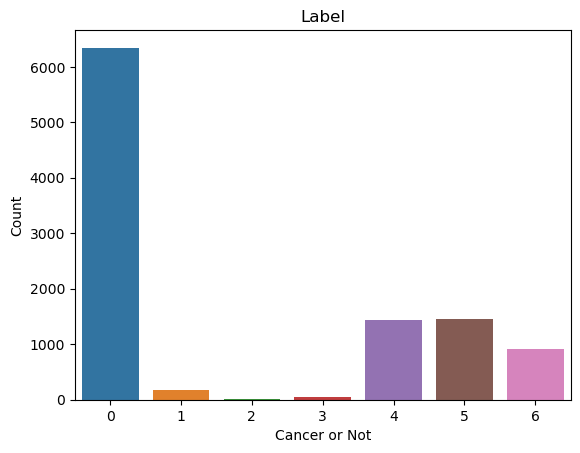

In [59]:
sns.countplot(data = dataset, x="label")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Label")

In [60]:
#Splitting the data into training and test test
X = dataset.iloc[:,1:7].values
y = dataset.iloc[:,7].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [61]:
X

array([[-0.743652, -0.134521, -0.175781, -0.31958 , -0.031982,  0.197266],
       [-0.828125,  0.028076, -0.325195, -0.95752 , -0.093994, -0.124023],
       [-0.953125, -0.015625,  0.234375,  0.03125 , -0.0625  , -1.09375 ],
       ...,
       [-0.751465, -0.232178, -0.169189, -0.344727, -0.09375 ,  0.289062],
       [-0.151367, -0.015625,  0.90625 , -0.125   , -0.125   , -1.078125],
       [-1.306396,  0.030762, -0.45752 , -1.212646, -0.030029, -0.288086]])

In [62]:
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(58,input_shape=(6,),activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.compile(Adam(lr=0.0028),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 58)                406       
                                                                 
 dense_38 (Dense)            (None, 128)               7552      
                                                                 
 dense_39 (Dense)            (None, 128)               16512     
                                                                 
 dense_40 (Dense)            (None, 256)               33024     
                                                                 
 dense_41 (Dense)            (None, 7)                 1799      
                                                                 
Total params: 59,293
Trainable params: 59,293
Non-trainable params: 0
_________________________________________________________________


c:\new\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [64]:
model_history=model.fit(x=X_train, y=y_train, epochs=10, batch_size=12,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/10
693/693 [==============================] - 4s 4ms/step - loss: 0.0779 - accuracy: 0.9156 - val_loss: 0.0575 - val_accuracy: 0.9360
Epoch 2/10
693/693 [==============================] - 3s 4ms/step - loss: 0.0478 - accuracy: 0.9498 - val_loss: 0.0546 - val_accuracy: 0.9398
Epoch 3/10
693/693 [==============================] - 3s 5ms/step - loss: 0.0449 - accuracy: 0.9502 - val_loss: 0.0405 - val_accuracy: 0.9581
Epoch 4/10
693/693 [==============================] - 3s 4ms/step - loss: 0.0412 - accuracy: 0.9546 - val_loss: 0.0392 - val_accuracy: 0.9567
Epoch 5/10
693/693 [==============================] - 4s 5ms/step - loss: 0.0413 - accuracy: 0.9555 - val_loss: 0.0385 - val_accuracy: 0.9524
Epoch 6/10
693/693 [==============================] - 4s 6ms/step - loss: 0.0397 - accuracy: 0.9558 - val_loss: 0.0354 - val_accuracy: 0.9586
Epoch 7/10
693/693 [==============================] - 4s 6ms/step - loss: 0.0388 - accuracy: 0.9585 - val_loss: 0.0363 - val_accuracy: 0.9586
Epoch 

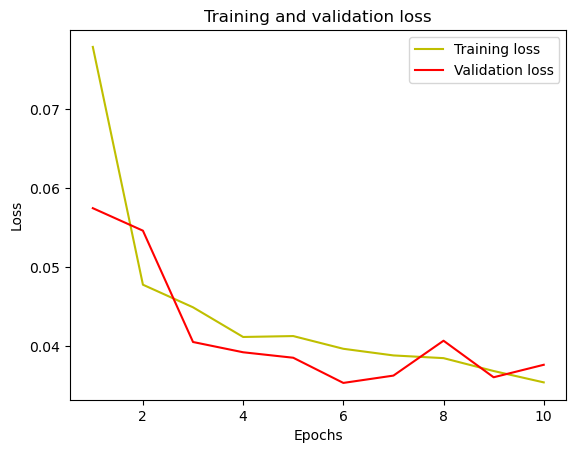

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

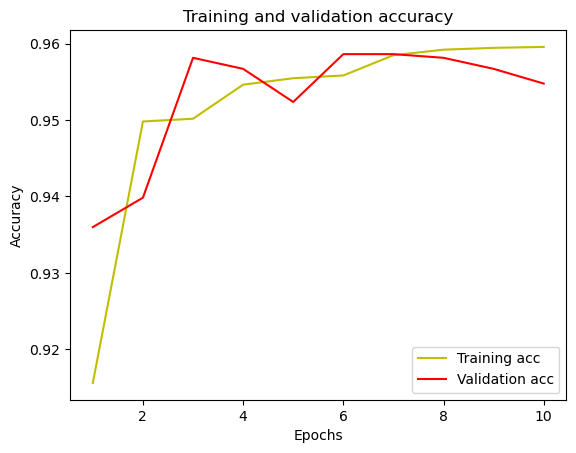

In [66]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [67]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1281
           1       0.00      0.00      0.00        39
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         7
           4       0.89      0.96      0.92       297
           5       1.00      1.00      1.00       269
           6       1.00      1.00      1.00       184

    accuracy                           0.95      2078
   macro avg       0.55      0.56      0.56      2078
weighted avg       0.94      0.95      0.95      2078

[[1247    5    0    0   29    0    0]
 [  34    0    0    0    5    0    0]
 [   1    0    0    0    0    0    0]
 [   6    0    0    0    1    0    0]
 [  12    1    0    0  284    0    0]
 [   0    0    0    0    0  269    0]
 [   0    0    0    0    0    0  184]]


c:\new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
